# EXERCISE 1

## (A) BackPropagation Algorithm Equations

The back propagation algorithm performs the task of minimizing a cost function with respect to the weights of a neural network. <br><br>
The cost function _J_ is of the form :

$$ J = \frac{1}{2}\sum_{k\mu}(T_{k\mu} -  y_{k\mu}^{(R)})^2 $$ where:

>$ T_{k\mu}$ is the target value of _kth_ neuron on pattern $\mu$ and<br>
>$ y_{k\mu}^{(R)}$ is the network's _kth_ neuron output on pattern $\mu$

We assume that $ \mu \in [0,P]$  and $ k \in [0,k_{r}]$ where _P_ is the number of different patterns and $k_{r}$ is the number of nodes in the _$r^{th}$_ layer. We assume also that our network consists of _R_ layers <br><br>

The Backpropagation Algorithm belongs in the family of _Gradient Descent_ algorithms and works in the following way: <br>

Once all _P_ patterns have been presented to the network and the cost function has been calculated on them using its current weight values (feedforward phase), it reverses the flow of computation (backward propagation), and starts updating the values of each weight parameter starting from the last layer and propagating to the first, using the following rule : <br>

$$  w_{ij}^{(r)(new)} = w_{ij}^{(r)(old)} - \epsilon\frac{\partial J}{\partial w_{ij}^{(r)}} $$ 

>where $w_{ij}^{(r)}$ is the value of the synapse that connects the _$i^{th}$_ node of layer _(r)_ to the _$j^{th}$_ node of layer _(r-1)_

The idea behind the above equation is that in order to find the proper parameter values that minimize _J_, we follow the gradient of _J_ with respect to those values in the opposite direction, trying to find it's global minimum (assuming that it exists). <br><br>

In order to calculate $\delta w_{ij}^{(r)} = -\epsilon\frac{\partial J}{w_{ij}^{(r)}} $ we have to use the chain rule of differentiation extensively, because _J_ depends explicitly only on the outputs of the last layer R, which in turn depend on the weights etc.<br>
We do this as follows: <br>
$$ \frac{\partial J}{\partial w_{ij}^{(r)}} = \sum_{\mu}^{P}\frac{\partial J}{\partial \upsilon_{i\mu}^{(r)}}\frac{\partial \upsilon_{i\mu}^{(r)}}{\partial w_{ij}^{(r)}} = \sum _{\mu}^{P} \frac{\partial J}{\partial \upsilon_{i\mu}^{(r)}}y_{j\mu}^{(r-1)} = \sum _{\mu}^{P} \delta_{i\mu}^{(r)}y_{j\mu}^{(r-1)}\;\;\; (1)$$  
>Where $\upsilon_{i\mu}^{(r)} = \sum_{j}^{k_{r-1}}w_{ij}^{(r)}y_{j\mu}^{(r-1)}$  and $y_{j\mu}^{(r-1)} = f(\upsilon_{j\mu}^{(r-1)})$ is the activation of the _$j^{th}$_ node from the previous layer on pattern $\mu$. <br><br>

To calculate $\delta_{i\mu}^{(r)} = \frac{\partial J}{\partial \upsilon_{i\mu}^{(r)}}$ we also apply the chain rule to get:<br>

$$\delta_{i\mu}^{(r)} = \frac{\partial J}{\partial \upsilon_{i\mu}^{(r)}} = \sum_{k}^{k_{r+1}}\frac{\partial J}{\partial \upsilon_{k\mu}^{(r+1)}}\frac{\partial\upsilon_{k\mu}^{(r+1)}}{\partial\upsilon_{i\mu}^{(r)}} = \sum_{k}^{k_{r+1}}\delta_{k\mu}^{(r+1)}\frac{\partial\upsilon_{k\mu}^{(r+1)}}{\partial y_{i\mu}^{(r)}}\frac{\partial y_{i\mu}^{(r)}}{\partial\upsilon_{i\mu}^{(r)}} = \sum_{k}^{k_{r+1}}\delta_{k\mu}^{(r+1)}w_{ki}^{(r+1)}f'(\upsilon_{i\mu}^{(r)}) $$

$$ \delta_{i\mu}^{(r)} = \sum_{k}^{k_{r+1}}\delta_{k\mu}^{(r+1)}w_{ki}^{(r+1)}f'(\upsilon_{i\mu}^{(r)}) \;\;\;(2) $$

The last result says that each $\delta$ that needs to be calculated in equation _(1)_ depends to the $\delta$ of each node of the next subsequent layer. <br>
So we have to calculate the $\delta$ of the nodes on the last layer _R_ and propagate these values backwards. <br>

This is done using the equation :
$$ \delta_{i\mu}^{(R)} = \frac{\partial J}{\partial\upsilon_{i\mu}^{(R)}} = \frac{\partial J}{y_{i\mu}^{(R)}}\frac{\partial y_{i\mu}^{(R)}}{\upsilon_{i\mu}^{(R)}} = (y_{i\mu}^{(R)}-T_{i\mu})f'(\upsilon_{i\mu}^{(R)}) $$ <br>
$$\delta_{i\mu}^{(R)} = (y_{i\mu}^{(R)}-T_{i\mu})f'(\upsilon_{i\mu}^{(R)}) \;\;\; (3)$$

<br><br>
Now that we have all the equations we will see their form for 3 different activation functions.

#### 1. Rectified Linear Unit - ReLU
$ f(x) =   \left\{\begin{array}{ll}
            x & \quad x \geq 0 \\
            0 & \quad x < 0
        \end{array}
    \right.$
    
<br>
Derivative: <br><br>
$ f'(x) = \left\{\begin{array}{ll}
            1 & \quad x > 0 \\
            0 & \quad x \leq 0
        \end{array}
    \right.\;\;\;$ with range $[0,1]$
<br><br>
Equation (2) takes the form : $ \delta_{i\mu}^{(r)} = \sum_{k}^{k_{r+1}}\delta_{k\mu}^{(r+1)}w_{ki}^{(r+1)}\;\; $, for $\upsilon_{i\mu}^{(r)}\geq 0$, and zero otherwise. 

<br>

Equation (3) takes the form: $ \delta_{i\mu}^{(R)} = (y_{i\mu}^{(R)}-T_{i\mu}) $ for $\upsilon_{i\mu}^{(R)}\geq 0$, and zero otherwise. 

#### 2. Sigmoid Function

$ f(x) = \sigma(x)= \frac{1}{1+e^{-x}} $
<br><br>
Derivative: <br><br>
$ f'(x) = \sigma'(x) = \frac{e^{-x}}{(1+e^{-x})^2} = \frac{1}{1+e^{-x}}\frac{e^{-x}}{1+e^{-x}}=\frac{1}{1+e^{-x}}(1-\frac{1}{1+e^{-x}}) = \sigma(x)(1-\sigma(x)) $

<br>
$\sigma'(x) = \sigma(x)(1-\sigma(x)) $, with range $[0,0.25]\cup[0.25,0]$

<br><br>
Equation (2) takes the form : $ \delta_{i\mu}^{(r)} = \sum_{k}^{k_{r+1}}\delta_{k\mu}^{(r+1)}w_{ki}^{(r+1)}\sigma(\upsilon_{i\mu}^{(r)})(1-\sigma(\upsilon_{i\mu}^{(r)})\;\; $ 

<br>

Equation (3) takes the form: $ \delta_{i\mu}^{(R)} = (y_{i\mu}^{(R)}-T_{i\mu})\sigma(\upsilon_{i\mu}^{(R)})(1-\sigma(\upsilon_{i\mu}^{(R)}) $ 

#### 3. Hyperbolic Tangent

$ f(x) = tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $
 <br><br>
Derivative:
<br><br>
$ f'(x) = \frac{(e^x-e^{-x})'(e^x+e^{-x})-(e^x-e^{-x})(e^x+e^{-x})}{(e^x+e^{-x})^2} = \frac{(e^x+e^{-x})^2-(e^x-e^{-x})^2}{(e^x+e^{-x})^2} = 1-\frac{(e^x-e^{-x})^2}{e^x+e^{-x})^2} = 1- tanh^2(x) $ <br><br>

Since the range of $f(x) = tanh(x)$ is $[-1,1]$ the range of the derivative $f'(x) = 1-tanh^2(x)$ is $[0,1]$ and it looks like a 'bell' with tha maximum at the point $x=0$.

<br><br>
Equation (2) takes the form : $ \delta_{i\mu}^{(r)} = \sum_{k}^{k_{r+1}}\delta_{k\mu}^{(r+1)}w_{ki}^{(r+1)}(1-tanh^2(\upsilon_{i\mu}^{(r)}))\;\; $ 

<br>

Equation (3) takes the form: $ \delta_{i\mu}^{(R)} = (y_{i\mu}^{(R)}-T_{i\mu})(1-tanh^2(\upsilon_{i\mu}^{(R)}) $ 


## (B) Train Fully Connected NNs to classify digits

#### Introduction

In this question we will train deep fully connected networks with various topologies that differ to each other in regards to the number of hidden layers and activation functions.<br>
These networks will be trained on the MNIST dataset which contains 60000 train and 10000 test handwritten images in the form of 28x28 pixel arrays. We set up the dataset by casting each pixel value from integer to float and then normalize each pixel value to the interval $[0.,1.]$ to ease the computations performed by the networks. <br>
All networks are built as combinations of: 5, 20, or 40 hidden layers with ReLU, tanh, Sigmoid or LeCun activation function (3x4 = 12 topologies). Each hidden layer consist of 32 nodes (neurons) in every case.<br>
The output layer of every topology consists of 10 nodes with Softmax activation function. The 10 nodes are needed in order to classify images among 10 different classes (digits from 0 to 9) and the Softmax activation is used to view the 10 output values as propabilities that sum up to 1, then use the node with the highest propability as the network's prediction.<br>
Every network topology is trained with keras Stochastic Gradient Descent (SGD) optimizer and learning rate ($\epsilon$) equal to 0.01 as instructed. The loss function that the optimizer tries to minimize is the Categorical Cross Entropy function which suits a multiclass classification problem such as this. Finally the networks are trained for 15 epochs.

#### Prepare and Visualize MNIST data

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


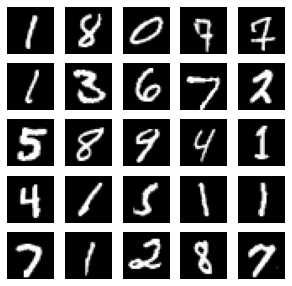

In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical, plot_model

# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.close('all')

#### Import libraries and define parameters of models

In [21]:
import keras.layers as l
import keras.models as m
import keras.optimizers as o
import tensorflow as tf

# define NN parameters
epochs = 10
batch_size = 128

# define optimizer
optMizer = tf.optimizers.SGD(learning_rate = 0.01)

#### Define LeCun activation function for question (D)

In [22]:
# we need keras backend to define a new function
from keras import backend as K
from keras.layers.core import Activation
from keras.utils.generic_utils import get_custom_objects

def lecun(x):
  return 1.7159*K.tanh((2/3)*x)+0.01*x

# register custom object (function) with keras in order to use string 'lecun' as alias to refer to it
get_custom_objects().update({'lecun': Activation(lecun)})

#### Define helpfull lists to built different NN topologies

In [23]:
numLayers = [5, 20, 40]
activations = ['relu','tanh','sigmoid','lecun']

#### Build models and store them to a dictionary

In [24]:
# Dictionary to store all different models
deepModels = {}

for layers in numLayers:
    for act in activations:
        Input = l.Input(shape=(28,28,1))
        hidden = l.Flatten()(Input)
        for i in range(layers):
            hidden = l.Dense(32, activation = act)(hidden)
        Output = l.Dense(10, activation = 'softmax')(hidden)
        classifier = m.Model(Input,Output)
        classifier.summary()
        classifier.compile(
            loss = 'categorical_crossentropy',
            optimizer = optMizer,
            metrics = ["accuracy"])
        # add model to dictionary as a "layers/activation"(key) - model(value) pair
        deepModels.update({str(layers)+ act : classifier})

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_272 (Dense)           (None, 32)                25120     
                                                                 
 dense_273 (Dense)           (None, 32)                1056      
                                                                 
 dense_274 (Dense)           (None, 32)                1056      
                                                                 
 dense_275 (Dense)           (None, 32)                1056      
                                                                 
 dense_276 (Dense)           (None, 32)                105

 dense_310 (Dense)           (None, 32)                1056      
                                                                 
 dense_311 (Dense)           (None, 32)                1056      
                                                                 
 dense_312 (Dense)           (None, 32)                1056      
                                                                 
 dense_313 (Dense)           (None, 32)                1056      
                                                                 
 dense_314 (Dense)           (None, 32)                1056      
                                                                 
 dense_315 (Dense)           (None, 32)                1056      
                                                                 
 dense_316 (Dense)           (None, 10)                330       
                                                                 
Total params: 45,514
Trainable params: 45,514
Non-trainable params: 0
______

 input_20 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 dense_359 (Dense)           (None, 32)                25120     
                                                                 
 dense_360 (Dense)           (None, 32)                1056      
                                                                 
 dense_361 (Dense)           (None, 32)                1056      
                                                                 
 dense_362 (Dense)           (None, 32)                1056      
                                                                 
 dense_363 (Dense)           (None, 32)                1056      
                                                                 
 dense_364 (Dense)           (None, 32)                1056      
          

 dense_414 (Dense)           (None, 32)                1056      
                                                                 
 dense_415 (Dense)           (None, 32)                1056      
                                                                 
 dense_416 (Dense)           (None, 32)                1056      
                                                                 
 dense_417 (Dense)           (None, 32)                1056      
                                                                 
 dense_418 (Dense)           (None, 32)                1056      
                                                                 
 dense_419 (Dense)           (None, 32)                1056      
                                                                 
 dense_420 (Dense)           (None, 10)                330       
                                                                 
Total params: 66,634
Trainable params: 66,634
Non-trainable params: 0
______

 dense_466 (Dense)           (None, 32)                1056      
                                                                 
 dense_467 (Dense)           (None, 32)                1056      
                                                                 
 dense_468 (Dense)           (None, 32)                1056      
                                                                 
 dense_469 (Dense)           (None, 32)                1056      
                                                                 
 dense_470 (Dense)           (None, 32)                1056      
                                                                 
 dense_471 (Dense)           (None, 32)                1056      
                                                                 
 dense_472 (Dense)           (None, 32)                1056      
                                                                 
 dense_473 (Dense)           (None, 32)                1056      
          

 dense_523 (Dense)           (None, 32)                1056      
                                                                 
 dense_524 (Dense)           (None, 32)                1056      
                                                                 
 dense_525 (Dense)           (None, 32)                1056      
                                                                 
 dense_526 (Dense)           (None, 32)                1056      
                                                                 
 dense_527 (Dense)           (None, 32)                1056      
                                                                 
 dense_528 (Dense)           (None, 32)                1056      
                                                                 
 dense_529 (Dense)           (None, 32)                1056      
                                                                 
 dense_530 (Dense)           (None, 32)                1056      
          

#### Train all models and store their history in a dictionary

In [25]:
# store each model's training history in a dictionary
history = {}

for key, model in deepModels.items():
    print(key)
    hStory = model.fit(
        x_train,
        y_train,
        batch_size = batch_size,
        epochs = epochs,
        shuffle = True,
        validation_split = 0.33)
    # add model to dictionary as "layers/activation"(key) - history(value) pair
    history.update({key : hStory})

5relu
Epoch 1/10
315/315 [==============================] - 1s 2ms/step - loss: 2.2581 - accuracy: 0.1884 - val_loss: 2.1868 - val_accuracy: 0.2134
Epoch 2/10
315/315 [==============================] - 1s 2ms/step - loss: 2.0253 - accuracy: 0.3051 - val_loss: 1.7526 - val_accuracy: 0.4456
Epoch 3/10
315/315 [==============================] - 1s 2ms/step - loss: 1.2969 - accuracy: 0.5807 - val_loss: 1.0378 - val_accuracy: 0.6140
Epoch 4/10
315/315 [==============================] - 0s 2ms/step - loss: 0.7723 - accuracy: 0.7595 - val_loss: 0.6298 - val_accuracy: 0.8089
Epoch 5/10
315/315 [==============================] - 0s 1ms/step - loss: 0.5356 - accuracy: 0.8441 - val_loss: 0.4724 - val_accuracy: 0.8605
Epoch 6/10
315/315 [==============================] - 0s 1ms/step - loss: 0.4475 - accuracy: 0.8697 - val_loss: 0.4432 - val_accuracy: 0.8662
Epoch 7/10
315/315 [==============================] - 0s 1ms/step - loss: 0.3994 - accuracy: 0.8839 - val_loss: 0.4467 - val_accuracy: 0.8555


315/315 [==============================] - 1s 4ms/step - loss: 0.3217 - accuracy: 0.9111 - val_loss: 0.2979 - val_accuracy: 0.9184
Epoch 6/10
315/315 [==============================] - 1s 4ms/step - loss: 0.2732 - accuracy: 0.9239 - val_loss: 0.7628 - val_accuracy: 0.8042
Epoch 7/10
315/315 [==============================] - 1s 4ms/step - loss: 0.2542 - accuracy: 0.9287 - val_loss: 0.2884 - val_accuracy: 0.9171
Epoch 8/10
315/315 [==============================] - 1s 4ms/step - loss: 0.2309 - accuracy: 0.9349 - val_loss: 0.2432 - val_accuracy: 0.9324
Epoch 9/10
315/315 [==============================] - 1s 4ms/step - loss: 0.2138 - accuracy: 0.9404 - val_loss: 0.8095 - val_accuracy: 0.8118
Epoch 10/10
315/315 [==============================] - 1s 4ms/step - loss: 0.2065 - accuracy: 0.9419 - val_loss: 0.2253 - val_accuracy: 0.9349


#### Evaluate the test accuracy of each model and store these scores in a dictionary 

In [26]:
test_score = {}
for key, model in deepModels.items():
    print(key)
    results = model.evaluate(x_test, y_test, batch_size = batch_size)
    test_score.update({key : results})

5relu
79/79 [==============================] - 0s 885us/step - loss: 0.3909 - accuracy: 0.8852
5tanh
79/79 [==============================] - 0s 885us/step - loss: 0.2795 - accuracy: 0.9205
5sigmoid
79/79 [==============================] - 0s 884us/step - loss: 2.3013 - accuracy: 0.1135
5lecun
79/79 [==============================] - 0s 885us/step - loss: 0.2581 - accuracy: 0.9252
20relu
79/79 [==============================] - 0s 1ms/step - loss: 1.4758 - accuracy: 0.3988
20tanh
79/79 [==============================] - 0s 1ms/step - loss: 0.2929 - accuracy: 0.9223
20sigmoid
79/79 [==============================] - 0s 1ms/step - loss: 2.3010 - accuracy: 0.1135
20lecun
79/79 [==============================] - 0s 1ms/step - loss: 0.2042 - accuracy: 0.9415
40relu
79/79 [==============================] - 0s 1ms/step - loss: 2.3010 - accuracy: 0.1135
40tanh
79/79 [==============================] - 0s 2ms/step - loss: 0.3799 - accuracy: 0.9125
40sigmoid
79/79 [==============================]

#### Test accuracy report

| # of hidden layers | Activation Function | Training Accuracy (%) |
| :---: | :---: | :---: |
| 5 | ReLU | 88 |
| 5 | tanh | 92 | 
| 5 | Sigmoid | 11 |
| 5 | LeCun | 92 |
| 20 | ReLu | 39 |
| 20 | tanh | 92 |
| 20 | sigmoid | 11 | 
| 20 | LeCun | 94 | 
| 40 | ReLU | 11 |
| 40 | tanh | 91 | 
| 40 | sigmoid | 11 | 
| 40 | LeCun | 93 |

#### Observations
> 1. The models that use 'logistic sigmoid' perform very badly every time even with 5 hidden layers. Basically the models aren't learning which means that the weights are not updated. This might be downto the fact that the range of the derivative of the sigmoid is limited to small values giving rise to the "vanishing gradient" problem. Another possibility is that the model "stucks" in a local minimum right from the beginning.
>2. When we increase the number of hidden layers to 20 the model that uses the ReLU starts degrading in accuracy. This might be down to the fact that as the network becomes deeper the number of redundant parameters increase. These parameters may have small values that become negative in the beginning of the training phase resulting in clipped activations. The tanh model performs pretty well.
>3. When we increase the number of hidden layers to 40 the ReLU and Sigmoid networks fail to learn the data and "underfit". In contrast the tanh performs respectibly.

#### Validation  accuracy plots

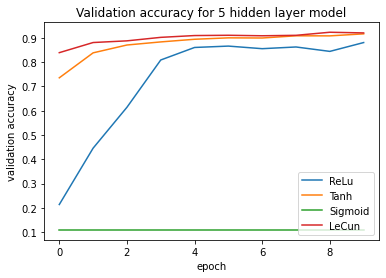

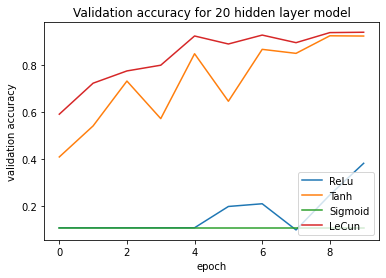

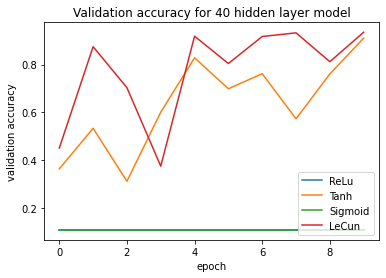

In [27]:
for layers in numLayers:
    for act in activations:
        plt.plot(history.get("{}{}".format(layers,act)).history['val_accuracy'])
    plt.title('Validation accuracy for {} hidden layer model'.format(layers))
    plt.xlabel('epoch')
    plt.ylabel('validation accuracy')
    plt.legend(['ReLu', 'Tanh', 'Sigmoid', 'LeCun'], loc = 'lower right')
    plt.show()

#### Loss function plots

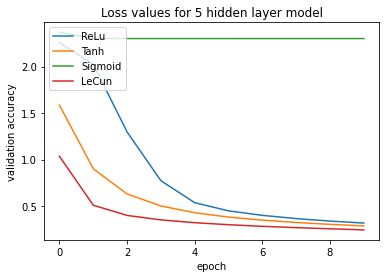

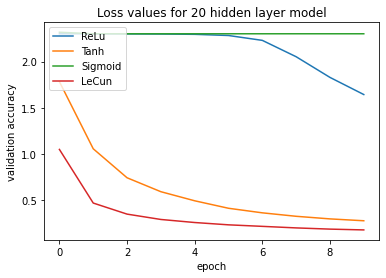

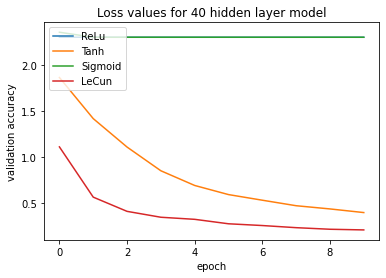

In [28]:
for layers in numLayers:
    for act in activations:
        plt.plot(history.get("{}{}".format(layers,act)).history['loss'])
    plt.title('Loss values for {} hidden layer model'.format(layers))
    plt.xlabel('epoch')
    plt.ylabel('validation accuracy')
    plt.legend(['ReLu', 'Tanh', 'Sigmoid', 'LeCun'], loc = 'upper left')
    plt.show()

## (C) Calculate Max Gradients of every topology

#### Method for extracting max gradient of each layer 

In [29]:
# maximum gradient function 
def getMaxGradient(model,Input,Output):
    # list to keep max gradients of each model's hidden layer
    max_grad = []
    loss_fn = tf.keras.losses.CategoricalCrossentropy()
    with tf.GradientTape() as tape:
        # forward pass
        logits = model(Input)
        # compute loss value for this input batch
        loss = loss_fn(Output,logits)
    # get gradients of loss wrt weights
    gradients = tape.gradient(loss,model.trainable_weights)
    for grad in gradients:
        # exclude dL/db (gradients wrt biases) which have shapes (32,1), (10,1)
        if grad.shape in [(784,32),(32,32),(32,10)]:
            max = np.max(grad)
            max_grad.append(max)
    return max_grad

#### Train every model again for 3 epochs and save history

In [30]:
#dictionary to store training history
history3Epochs = {}
for key, model in deepModels.items():
    print(key)
    hStory = model.fit(
        x_train,
        y_train,
        batch_size = batch_size,
        epochs = 3,
        shuffle = True,
        validation_split = 0.33)
    history3Epochs.update({key : hStory})  

5relu
Epoch 1/3
315/315 [==============================] - 1s 2ms/step - loss: 0.2956 - accuracy: 0.9134 - val_loss: 0.4547 - val_accuracy: 0.8517
Epoch 2/3
315/315 [==============================] - 0s 2ms/step - loss: 0.2801 - accuracy: 0.9176 - val_loss: 0.3723 - val_accuracy: 0.8839
Epoch 3/3
315/315 [==============================] - 1s 2ms/step - loss: 0.2657 - accuracy: 0.9211 - val_loss: 0.2784 - val_accuracy: 0.9149
5tanh
Epoch 1/3
315/315 [==============================] - 1s 2ms/step - loss: 0.2711 - accuracy: 0.9252 - val_loss: 0.2787 - val_accuracy: 0.9209
Epoch 2/3
315/315 [==============================] - 1s 2ms/step - loss: 0.2587 - accuracy: 0.9284 - val_loss: 0.2700 - val_accuracy: 0.9214
Epoch 3/3
315/315 [==============================] - 1s 2ms/step - loss: 0.2475 - accuracy: 0.9306 - val_loss: 0.2649 - val_accuracy: 0.9231
5sigmoid
Epoch 1/3
315/315 [==============================] - 1s 2ms/step - loss: 2.3011 - accuracy: 0.1141 - val_loss: 2.3017 - val_accuracy:

#### Extract max gradient of each layer for every topology

In [31]:
#dictionary to store max gradient of each layer for every model
maxGrads = {}
for key, model in deepModels.items():
    maxGradient = getMaxGradient(model,x_train[0:32],y_train[0:32])
    maxGrads.update({key : maxGradient})

#### Plot "max depth vs. max gradient"

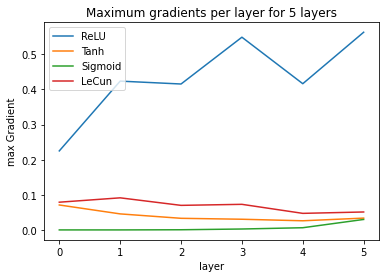

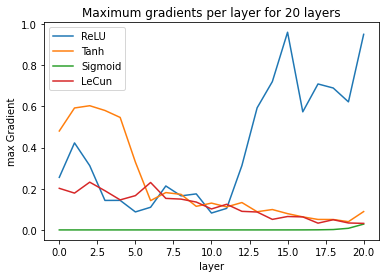

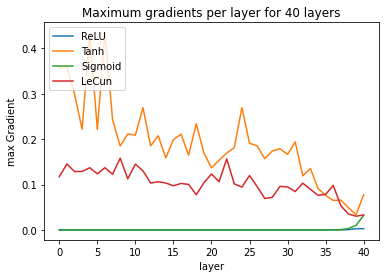

In [32]:
for layers in numLayers:
    for act in activations:
        plt.plot(maxGrads.get("{}{}".format(layers,act)))
    plt.title("Maximum gradients per layer for {} layers".format(layers))
    plt.xlabel("layer")
    plt.ylabel("max Gradient")
    plt.legend(['ReLU', 'Tanh', 'Sigmoid', 'LeCun'], loc = 'upper left')
    plt.show()

#### Comments

I used a mini-batch of 32 samples from the beginning of the training set because i believe that the models haven't learned the dataset yet and the gradients take non zero values.<br>  
The sigmoid layers tend to have zero gradients for all topologies. This means that during the back propagation phase, the parameters (weights and biases) are not updated appropriately and the network can't learn thus resulting in poor performance. <br>
For 5 layers the ReLu, tanh and LeCun performed pretty well. We see now that their max gradients are non zero. The tanh and LeCun change in a smooth way and tend to minimize, while the ReLU's gradients increase and then decrease in a "harsh" way.<br>
For 20 and 40 layers the sigmoid gradients are vanished. For the 40 layers the ReLU gradients are also vanished, resulting in no learning while the tanh and LeCun have non zero values and update their weights corresponding to good accuracies.

## (D) LeCun

$ f(x) = LeCun(x) = 1.7159tanh(\frac{2}{3}x)+0.01x $ <br><br>
$f'(x) = LeCun'(x) = 1.7159\cdot \frac{2}{3}\cdot tanh'(\frac{2}{3}x) +  0.01 \approx 1.14(1-tanh^2(\frac{2}{3}x))+0.01$

<br><br>
Equation (2) takes the form : $ \delta_{i\mu}^{(r)} = \sum_{k}^{k_{r+1}}\delta_{k\mu}^{(r+1)}w_{ki}^{(r+1)}[1.14(1-tanh^2(\upsilon_{i\mu}^{(r)}))+0.01]\;\; $ 

<br>

Equation (3) takes the form: $ \delta_{i\mu}^{(R)} = (y_{i\mu}^{(R)}-T_{i\mu})[1.14(1-tanh^2(\upsilon_{i\mu}^{(R)}))+0.01] $ <br><br>

The range of the gradient of the LeCun(x) function is $[0,1.154]$ and it's shape looks like a smooth bell with max value at point x=0.<br><br>

__Comparing__ the tanh and LeCun validation accuracy plots, we see that the LeCun is always larger than the tanh accuracy though they tend to change in a uniform way, producing similar results.
